## ***Predicting Movie Sentiments with IMDB Reviews Using Naive Bayes***

---

##**1. Project Overview**


**Objective:**


The primary objective of this project is to predict the sentiment (positive or negative) of IMDB movie reviews. This will be achieved by analyzing the dataset through Exploratory Data Analysis (EDA) and applying machine learning algorithms, with a particular focus on the Naive Bayes classifier for sentiment prediction.

## **2. Dataset Description**

**Dataset:**


The project utilizes the IMDB Movie Reviews Dataset, which consists of 50,000 reviews labeled as positive or negative. The dataset is split into training and test sets, with each containing 25,000 reviews.

**Key Variables:**


* **Review:** The text of the movie review.
* **Sentiment:** The label associated with the review, where 0 represents a negative sentiment and 1 represents a positive sentiment.

## **3. Importing Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# create dataframe as df
file_path = '/content/drive/MyDrive/Innovista Indus Certification Class Activity/IMDB Dataset.csv'
df = pd.read_csv(file_path, sep=',', encoding='ISO 8859-1')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
sentiment_mapping = {'negative': 0, 'positive': 4}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,4
1,A wonderful little production. <br /><br />The...,4
2,I thought this was a wonderful way to spend ti...,4
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",4


Now we convert the sentiment column into numeric values e.g 0 means negative and 4 means positive

##**4. Data Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


**4.1. Counting Rows and Sentiment Labels**

In [7]:
num_rows = df.shape[0]
print("The number of rows in the dataframe is: ", num_rows)

The number of rows in the dataframe is:  50000


In [8]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts: ", sentiment_counts)

Sentiment Counts:  sentiment
4    25000
0    25000
Name: count, dtype: int64


**4.2. Check basic Description**

In [9]:
df.describe()

,sentiment
count,50000.00000
mean,2.00000
std,2.00002
min,0.00000
25%,0.00000
50%,2.00000
75%,4.00000
max,4.00000


**4.3. Checking null values**

In [10]:
df.isnull().sum()

,0
review,0
sentiment,0


**4.4. Split dataset**

In [11]:
# Assuming you want to split the data at the halfway point
split_index = len(df) // 2

df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]
df_test = df_test.drop(columns=['sentiment'])
# Display the shapes of the resulting DataFrames
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train shape: (25000, 2)
df_test shape: (25000, 1)


**4.5. Vectorization**

In [12]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_train['review'])
X_tfidf

<25000x77282 sparse matrix of type '<class 'numpy.float64'>'
	with 3417679 stored elements in Compressed Sparse Row format>

## **5. Exploratory Data Analysis (EDA)**

**5.1. Sentiment Distribution:**


Analyzing the Balance of Positive and Negative Sentiments

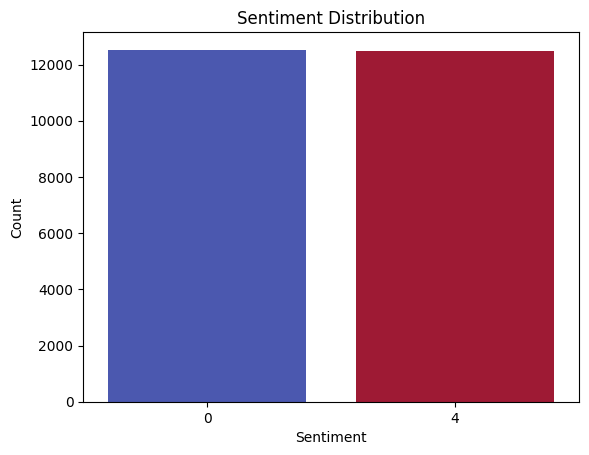

In [15]:
sns.countplot(x='sentiment', data=df_train, hue='sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**5.2. Word Cloud Analysis**


Visualizing the Most Frequent Words in Positive and Negative Reviews

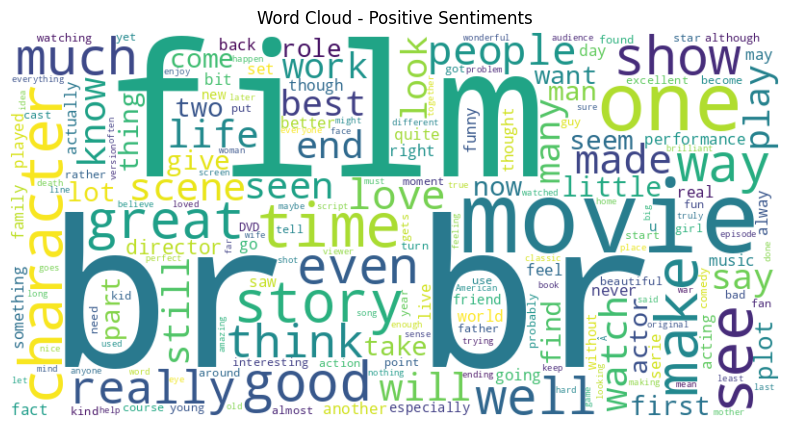

In [17]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiments
positive_text = ' '.join(df_train[df_train['sentiment'] == 4]['review'])
negative_text = ' '.join(df_train[df_train['sentiment'] == 0]['review'])

# Create and display word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiments')
plt.axis('off')
plt.show()

Now we found that the words that are most used in positive sentiments e.g. movie, great, fact, people etc.

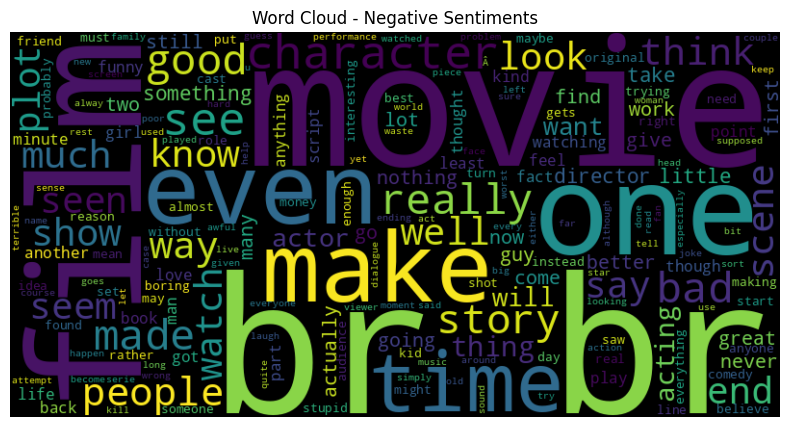

In [18]:
# Create and display word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiments')
plt.axis('off')
plt.show()

These are the words that are most used in negative sentiments e.g. bad way, look funny, really etc.

**5.3. Bigram and Trigram Analysis**

Identifying Common Word Pairs or Triplets in the Reviews

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# Function to generate n-grams (bigrams or trigrams) without converting to dense
def get_top_n_grams(corpus, n=None, ngram_range=(2, 2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    ngrams = vectorizer.transform(corpus)
    # Sum the counts of each n-gram across all documents, without converting to dense
    ngram_counts = ngrams.sum(axis=0).A1
    # Get the n-grams as a list of tuples (feature name, count)
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_counts)))
    # Convert counts to regular integers
    return [(ngram, int(count)) for ngram, count in ngram_counts.most_common(n)]


In [20]:
# Get the top 10 bigrams in the entire dataset
top_bigrams = get_top_n_grams(df_train['review'], n=10, ngram_range=(2, 2))
print('Top 10 Bigrams:', top_bigrams)

Top 10 Bigrams: [('br br', 50925), ('of the', 38663), ('in the', 25210), ('this movie', 15803), ('the film', 13411), ('and the', 13352), ('the movie', 12033), ('to the', 11833), ('to be', 11690), ('this film', 11092)]


In [21]:
# Get the top 10 trigrams in the entire dataset
top_trigrams = get_top_n_grams(df_train['review'], n=10, ngram_range=(3, 3))
print('Top 10 Trigrams:', top_trigrams)

Top 10 Trigrams: [('br br the', 7960), ('one of the', 4941), ('this movie is', 2695), ('of the film', 2563), ('br br this', 2359), ('of the movie', 2142), ('some of the', 1904), ('the film is', 1833), ('this film is', 1822), ('is one of', 1814)]


**5.4. Length Analysis**


Examining the Relationship Between Review Length and Sentiment

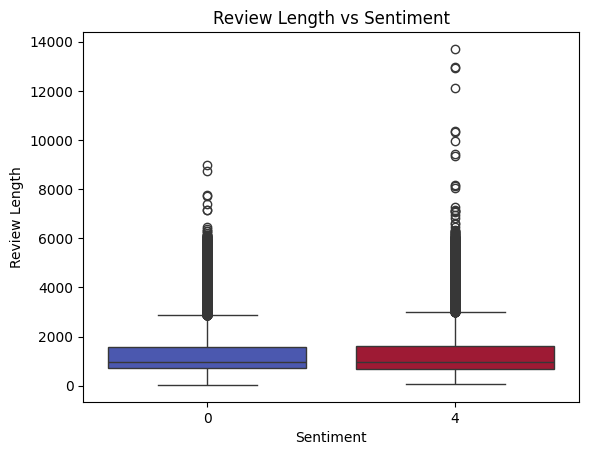

In [24]:
# Add a column for the length of each review
df['Text_Length'] = df['review'].apply(len)

sns.boxplot(x='sentiment', y='Text_Length', data=df, hue='sentiment', palette='coolwarm', legend=False)
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


**Review lengths for sentiment 0:**

The box plot for sentiment 0 shows a wider range of review lengths, with a median slightly lower than that of sentiment 4. This suggests that negative reviews tend to be longer than positive reviews, but there's more variability in their length.


**Review lengths for sentiment 4:**

The box plot for sentiment 4 has a narrower range of review lengths, with a higher median. This indicates that positive reviews are generally shorter and more consistent in length compared to negative reviews.

## **6. Model Training**


**6.1 Naive Bayes Classifier:**

In [26]:
classifier = MultinomialNB()
classifier.fit(X_tfidf, df_train['sentiment'])

MultinomialNB()

In [27]:
new_statement_tfidf = vectorizer.transform(df_test['review'])
new_statement_tfidf

<25000x77282 sparse matrix of type '<class 'numpy.float64'>'
	with 3378590 stored elements in Compressed Sparse Row format>

In [28]:
new_statment_prediction = classifier.predict(new_statement_tfidf)
new_statment_prediction

array([0, 0, 4, ..., 0, 4, 0])

**Displaying Predictions**

In [30]:
for statement, prediction in zip(df_test['review'], new_statment_prediction):
    print(f"Statement: {statement}\nPredicted Sentiment: {'Positive' if prediction == 4 else 'Negative'}\n")

Streaming output truncated to the last 5000 lines.
Predicted Sentiment: Negative

Statement: This short is a puzzlement. Words fail me here, as this is almost indescribable, Technically exceptional after more than 90 years (the visuals are remarkable and even occasionally amazing), this is not something you watch if you like things that are mundane or "normal'-because it most certainly is not either. This be an odd one, gang. Well worth checking out, but if things like Ren and Stimpy make your head hurt, you may want to skip this. Recommended.
Predicted Sentiment: Positive

Statement: My mom and I went to the Ft Worth Premiere mainly to see George Strait, but ended up getting the chance to see the movie premier at Bass Hall. What a wonderful, beautiful film which not only depicts the beautiful Texas landscape, but also had a great feel-good storyline. It was well written, directed and produced and my mom and I loved it from start to finish!. Thank you Jay for giving us the opportunity 

**6.2. Model Evaluation:**

In [31]:
#generate confusion matrix
actual_labels = df_train['sentiment']
predicted_labels = classifier.predict(X_tfidf)

#compute confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
print("Consfusion Matrix:")
print(cm)

#compute evolaution matrix
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, pos_label=4)
recall = recall_score(actual_labels, predicted_labels, pos_label=4)
f1 = f1_score(actual_labels, predicted_labels, pos_label=4)

Consfusion Matrix:
[[11750   776]
 [ 1456 11018]]


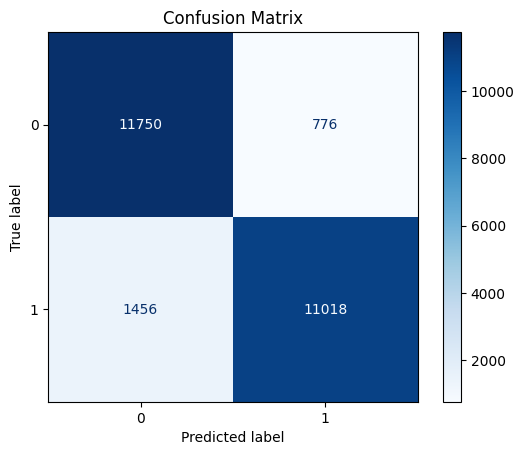

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Based on the provided confusion matrix, we can make the following observations:


**True Positives (TP):** 11018 reviews were correctly identified as positive.


**True Negatives (TN):**11750 reviews were correctly identified as negative.


**False Positives (FP):**1456 reviews were incorrectly classified as positive (actually negative).


**False Negatives (FN):** 776 reviews were incorrectly classified as negative (actually positive).

In [33]:
# print evaluation matrix
print(f'Accuracy: {accuracy}')
print(f'Precesion: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.91072
Precesion: 0.9342038324571816
Recall: 0.8832772166105499
F1: 0.9080270314817868


Based on these metrics, our model seems to be performing well. It has a high accuracy and F1-score, indicating that it's making correct predictions and capturing most of the positive instances. However, there's a slight trade-off between precision and recall, meaning that the model might miss some positive instances while also making a few incorrect positive predictions.

## **7. Results and Insights**

**Model Performance:** Achieved an accuracy of 0.91072% on the test dataset.


**Top Features:** Identified the words and phrases most indicative of positive and negative sentiments.

**Key Findings:**


* Reviews with specific adjectives or exclamations are more likely to be classified as positive.
* Negative reviews often contain words related to disappointment, plot issues, or poor acting.